# Logistic Regression

Linear regression allows to model relationships between **continuos independent and dependent variables** and **between qualitative independent variables and continuous variables**. However, it does not allow to model relationships between continuous or qualitative independent variables and **qualitative dependent variables**.

## Example Data
Establishing such relationships is useful in different contexts. For instance, let us consider the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset:

In [116]:
from ucimlrepo import fetch_ucirepo 
from matplotlib import pyplot as plt
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

data = X.join(y)
data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


The dataset contains several measurements of given quantities measured from digitized image of a fine needle aspirate (FNA) of a breast mass, together with a categorical variable `Diagnosis` with two levels: `M` (malignant) and `B` (benign).

In this case, it would be good to be able to study whether a relationship exists between some of the considered independent variables and the dependent variable. 

We will consider the `radius1` variable for the moment. Let us plot this variable with respect to `Diagnosis`:

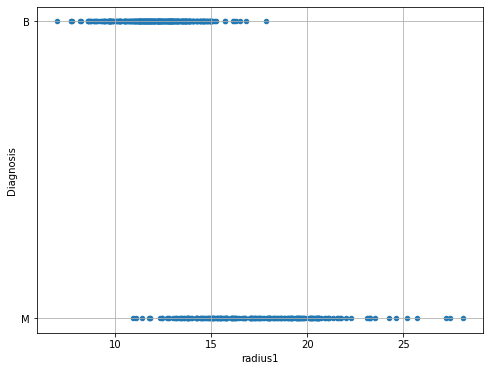

In [117]:
data.plot.scatter(x='radius1',y='Diagnosis', figsize=(8,6))
plt.grid()
plt.show()

From the plot above, we can note that there is some form of relationship between the two variables. Indeed:
* For low values of `radius1`, we tend to have more benign cases;
* For large values of `radius1`, we tend to have more malignant cases.

## Limits of Linear Regression
Of course, we would like to quantify this relationship in a more formal way.
**As in the case of a linear regressor, we want to define a model which can predict the independent variable $y$ from the dependent variables $x_i$. If such model gives good predictions, than we can trust its interpretation as a means of studying the relationship between the variables.**

We can think of converting `B => 1` and `M => 0`, and then compute a linear regressor:

$$Diagnosis = \beta_0 + \beta_1 radius1$$

This would be the result:

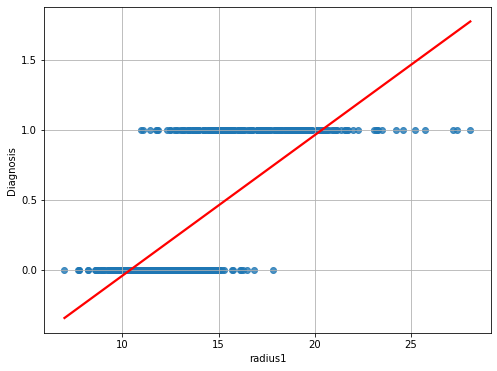

In [147]:
import seaborn as sns
data['Diagnosis']=data['Diagnosis'].replace({'B':0,'M':1})
plt.figure(figsize=(8,6))
sns.regplot(x=data['radius1'],y=data['Diagnosis'], ci=None, line_kws={'color':'red'})
plt.grid()
plt.show()

We can immediately see that this function does not model the relationship between the two variables very well. While we obtain a statistically relevant regressor with $R^2=0.533$ and statistically relevant coefficients, the residual plot will look like this:

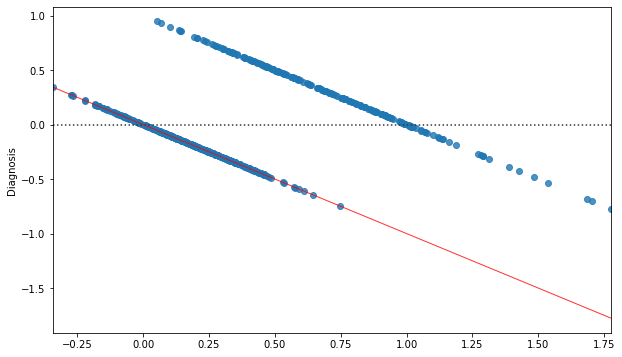

In [137]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#ols("Diagnosis ~ radius1", data).fit().summary()
fitted=ols("Diagnosis ~ radius1", data).fit().fittedvalues
plt.figure(figsize=(10,6))
sns.residplot(x=fitted, y='Diagnosis', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

The correlation between the residuals and the independent variable is a strong indication that the true relationship between the two variables is not correcly modeled. After all, from a purely predictive point of view, we are using a linear regressor which takes the form:

$$f:\mathbb{R} \to \mathbb{R}$$

while the values `Diagnosis` variable belong to the set $\{0,1\}$ and we would need instead a function with the following form:

$$f:\mathbb{R} \to \{0,1\}$$

However, the linear regressor cannot directly predict **discrete values**. 

**In practice, while with a linear regressor we wanted to predict continuous values, now we want to assign observations $\mathbf{x}$ to discrete bins (in this case only two possible ones). As we will better study later in the course, this problem is known as classification.**

## From Binary Values to Probabilities
If we want to model some form of continuous value, we could think to transition from $\{0,1\}$ to $[0,1]$ using probabilities, which is a way to turn discretized values to "soft" values indicating our belief in the fact that `Diagnosis` will take either a $0$ or $1$ value. We could hence think to model the following probability, rather than modeling `Diagnosis` directly:

$$P(Diagnosis=1| radius1)$$

However, even in this case, a model of the form:

$$P(Diagnosis=1|radius1) = \beta_0 + \beta_1 radius1$$

Would not be appropriate. Indeed, while $P(Diagnosis=1| radius1)$ needs to be in the $[0,1]$ range, the linear combination $\beta_0 + \beta_1 radius1$ will naturally output values **smaller than $0$** and **larger than $1$**. How should we interpret such values?

Intuitively, we would expect to $P(Diagnosis=1| radius1)$ to assume values in the $[0,1]$ range for intermediate values (say `radius` $\in [10,20]$), while for extremely low values of (say `radius` $<10$) the probability **should saturate to $0$** and for extremely large values (say `radius` $>20$) the probability should saturate to 1.

when `radius1` takes large values (say larger than $20$), we expect **probability to saturate to $1$**.

In practice, we would expect a result similar to the following:

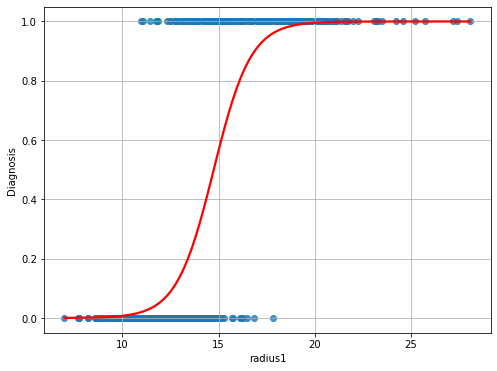

In [148]:
plt.figure(figsize=(8,6))
sns.regplot(x=data['radius1'],y=data['Diagnosis'], logistic=True, ci=None, line_kws={'color':'red'})
plt.grid()
plt.show()

As can be noted, the function above is not linear, and hence it cannot be fit with a linear regressor. However, we have seen that a linear regressor can be tweaked to also represent nonlinear functions.

## The Logistic Function
Similarly to polynomial regression, we need to find a **transformation of the formulation of the linear regressor to transform its output into a nonlinear function of the independent variables**. Of course, we do not want *any* transformation, but one that has the previously highlighted properties. While different functions have similar characteristics, in practice the **logistic function has some nice properties that, as we will se in a moment, allow to easily interpret the resulting model in a probabilistic way**. The logistic function is defined as:

$$f(x) = \frac{1}{1+e^{-x}}$$

and has the following shape:

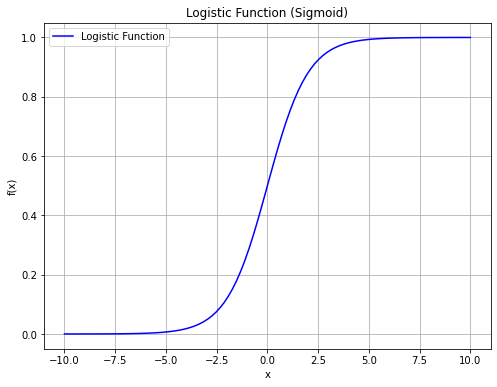

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic (sigmoid) function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)  # Creating 100 evenly spaced values from -6 to 6

# Calculate y values using the logistic function
y = logistic_function(x)

# Plot the logistic function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Logistic Function', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Logistic Function (Sigmoid)')
plt.grid()
plt.legend()
plt.show()


As we can see, the function has the properties we need:
* Its values are comprised between $0$ and $1$;
* It saturates to $0$ and $1$ for extreme values of $x$.

## The Logistic Regression Model
In practice, we define our model, **the logistic regressor model** as follows (**simple logistic regression**):

$$P(Diagnosis=1|X) = f(\beta_0 + \beta_1 X) = \frac{1}{1+e^{-(\beta_0 + \beta_1 X)}}$$

Or, more in general (**multiple logistic regression**):

$$P(y=1|\mathbf{x}) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)}}$$

It is easy to see that:

$$p=\frac{1}{1+e^{-x}} \Rightarrow p+pe^{-x} = 1 \Rightarrow pe^{-x} = 1-p \Rightarrow e^{-x} = \frac{1-p}{p} \Rightarrow e^{x} = \frac{p}{1-p}$$

Hence:

$$e^{\beta_0+\beta_1x_1 + \ldots + \beta_nx_n} = \frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}$$

We note that the term on the right is the odd of $P(y=1|\mathbf{x})$. We recall that the odd of $P(y=1|\mathbf{x})$ is the number of times we believe the example will be positive (observed $\mathbf{x}$) over the number of times we believe the example will be negative. For instance, if we believe that the example will be positive $3$ times out of $10$, then the odd will be $\frac{3}{7}$.

By taking the logarithm of both terms, we obtain:

$$\log \left(\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}\right) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

The expression:

$$\log \left(\frac{P(y=1|\mathbf{x})}{1-P(y=1|\mathbf{x})}\right)$$

Is the logarithm of the odd (log odd), and it is called **logit**, hence the **logistic regression** is sometimes called **logit regression**.


The expression above shows how a logistic regressor can be seen as **a linear regressor (the expression on the right side of the equation) on the logit (the log odd)**. This paves the way to useful interpretations of the model, as shown in the next section.

## Statistical Interpretation of the Coefficients of a Linear Regressor

Let's now see how to interpret the coefficients of a logistic regressor. Remember that the regression model (in the case of simple logistic regression) is as follows:

$$
\log(\frac{p}{1-p})=\beta_0 + \beta_1 x
$$

Applying what we know about linear regressors, we can write:

$$x=0 \Rightarrow \ln(\frac{p}{1-p})=\beta_0$$ 

To have a clearer picture, we can exponentiate both sides of the equation and write: 

$$x=0 \Rightarrow \frac{p}{1-p}=e^{\beta_0}$$ 

Remember that $\frac{p}{1-p}$ is the odds that the dependent variable is equal to 1 when observing $x$ and, as such, it has a clear interpretation. For example, if the odds of an event are \frac{3}{1}, then it is $3$ times more likely to occur than not to occur. So, **for $x=0$, it is $e^{\beta_0}$ times more likely that the dependent variable is equal to 1, rather than being equal to 0**.

How can we interpret the **coefficient values**? 

Let us define:

$$odds(p|x) = \frac{P(y=1|x)}{1-P(y=1|x)}$$

We can write:

$$
\log odds(p|x) = \beta_0 + \beta_1 x
$$

We can write:
$$
\log odds(p|x+1) - \log odds(p|x) = \beta_0 + \beta_1 (x+1) - \beta_0 - \beta_1 x = \beta_1 (x+1) - \beta_1 x = \beta_1
$$

Exponentiating both sides, we get:
$$
e^{\log odds(p|x+1) - \log odds(p|x)} = e^{\beta_1} \Rightarrow \frac{e^{\log odds(p|x+1)}}{e^{\log odds(p|x)}} = e^{\beta_1} \Rightarrow \frac{odds(p|x+1)}{odds(p|x)} = e^{\beta_1} \Rightarrow odds(p|x+1) = e^{\beta_1}odds(p|x)
$$

We can thus say that **increasing the variable $x$ by one unit corresponds to a multiplicative increase in odds by $e^{\beta_1}$**.

This analysis can be easily extended to the case of a multiple logistic regressor. Hence in general, given the model:

$$P(y=1|\mathbf{x}) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

We can say that:

* $e^\beta_0$ is the odd of $y$ being equal to $1$ rather than $0$ when $x_i=0 \forall i$;
* An increment of one unit in the independent variable $x_i$ corresponds to a multiplicative increment of $e^\beta_i$ in the odds of $y=1$. So if $e^\beta_i=0.05$, then $y=1$ is $5\%$ more likely for a one-unit increment of $x$.

## Geometrical Interpretation of the Coefficients of a Linear Regressor
Similar to linear regression, also the coefficients of logistic
regression have a geometrical interpretation. We will see that, while
linear regression finds a «curve» that fits the data, logistic
regression finds a hyperplane that separates the data.

Let us consider a simple example with bi-dimensional data
$\mathbf{x} \in \mathfrak{R}^{2}$ as the one shown in the following:

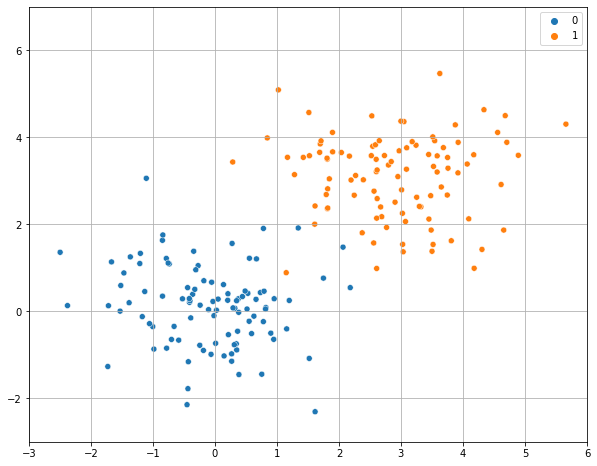

In [153]:
import numpy as np
x=np.array(list(np.random.normal(0,1,100))+list(np.random.normal(3,1,100)))
y=np.array(list(np.random.normal(0,1,100))+list(np.random.normal(3,1,100)))
l=np.array([0]*100+[1]*100)
plt.figure(figsize=(10,8))
sns.scatterplot(x=x,y=y,hue=l)
plt.xlim([-3,6])
plt.ylim([-3,7])
plt.legend()
plt.grid()
plt.show()

Let us assume that we fit a logistic regressor model to this data

$$P\left( y=1 | \mathbf{x} \right) = \frac{1}{1 + e^{- {(\beta}_{0} + \beta_{1}x_{1} + \beta_{2}x_{2})}}$$

and find the following values for the parameters:

$$\left\{ \begin{matrix}
\beta_{0} = - 3.47 \\
\beta_{1} = 1.17 \\
\beta_{2} = 1.43 \\
\end{matrix} \right.\ $$

We know that these parameters allow to find a probability value according to the formula above.
We can use these values to **classify the observations** $\mathbf{x}$. In practice, a reasonable criterion to classify observations would be:

$$\hat y = \begin{cases}1 & \text{if } P(y=1|\mathbf{x}) \geq 0.5\\0 & \text{otherwise}\end{cases}$$

This makes sense as we are assigning the observations to the group for which the posterior probability $P(y|\mathbf{x})$ is higher. 

To understand how the data is classified, we can look at those points in
which the classifier is uncertain, which is often called **the decision boundary**, i.e.,
those points in which $P\left( y=1 | \mathbf{x} \right) = 0.5$.

We note that:

$$P\left(y=1 | \mathbf{x} \right) = 0.5 \Leftrightarrow e^{- (\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2})} = 1 \Leftrightarrow 0 = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}$$

This last equation is the equation of a line (in the form
$ax + by + c = 0$). We can see it in explicit form:

$$x_{2} = - \frac{\beta_{1}}{\beta_{2}}x_{1} - \frac{\beta_{0}}{\beta_{2}}$$

So, we have found a line which has a

-   Angular coefficient equal to $- \frac{\beta_{1}}{\beta_{2}}$;

-   Intercept equal to $- \frac{\beta_{0}}{\beta_{2}}$;

If we plot this line, we obtain the **decision boundary** which
separates the elements from the two classes:

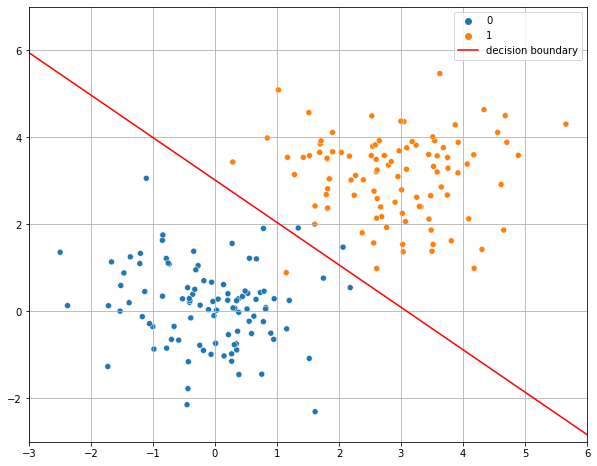

In [157]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(np.vstack([x,y]).T,l)
xx = np.linspace(-3,6)
yy = -lr.coef_[0][0]/lr.coef_[0][1]*xx-lr.intercept_/lr.coef_[0][1]
plt.figure(figsize=(10,8))
sns.scatterplot(x=x,y=y,hue=l)
plt.xlim([-3,6])
plt.ylim([-3,7])
plt.plot(xx,yy,'r', label='decision boundary')
plt.legend()
plt.grid()
plt.show()

As can be seen, the decision boundary found by a logistic regressor is a
line. This is because **a logistic regressor is a linear classifier**,
despite the logistic function is not linear!

## Estimation of the Parameters of a Logistic Regressor

To fit the model and find suitable values for the $\mathbf{\beta_i}$
parameters, we will define a **cost function**, similarly to what we have
done in the case of linear regression. 

Even if we can see the logistic
regression problem as the linear regression problem of fitting the
$logit(p) = \mathbf{\beta}^{T}\mathbf{x}$ function, differently from
linear regression, *we should note that we do not have the ground truth
probabilities p*. Indeed, our dataset only provides input examples
$\mathbf{x}^{(i)}$ and the corresponding labels $y$.

Starting from the definition:

$$P\left( y = 1 \middle| \mathbf{x} \right) = f_{\mathbf{\theta}}\left( \mathbf{x} \right) = \frac{1}{1 + e^{- \mathbf{\theta}^{T}\mathbf{x}}} = \sigma(\mathbf{\theta}^{T}\mathbf{x})$$

We can write:

$$P\left( y = 1 \middle| \mathbf{x};\mathbf{\theta} \right) = f_{\mathbf{\theta}}(\mathbf{x})$$

$$P\left( y = 0 \middle| \mathbf{x};\mathbf{\theta} \right) = 1 - f_{\mathbf{\theta}}(\mathbf{x})$$

This can also be written as follows in a more compact form:

$$P\left( y \middle| \mathbf{x};\mathbf{\theta} \right) = \left( f_{\mathbf{\theta}}\left( \mathbf{x} \right) \right)^{y}\left( 1 - f_{\mathbf{\theta}}\left( \mathbf{x} \right) \right)^{1 - y}$$

Indeed, when $y = 1$, the second factor is equal to $1$ and the
expression reduces to
$P\left( y = 1 \middle| \mathbf{x};\mathbf{\theta} \right) = f_{\mathbf{\theta}}(\mathbf{x})$.
Similarly, if $y = 0$, the first factor is equal to $1$ and the
expression reduces to $1 - f_{\mathbf{\theta}}(x)$.

We can estimate the parameters by maximum likelihood, i.e., choosing the
values of the parameters which maximize the probability of the data
under the model identified by the parameters $\mathbf{\theta}$:

$$L\left( \mathbf{\theta} \right) = P(Y|X;\mathbf{\theta})$$

If we assume that the training examples are all independent, the
likelihood can be expressed as:

$$L\left( \mathbf{\theta} \right) = \prod_{i = 1}^{N}{P(y^{(i)}|\mathbf{x}^{(i)};\mathbf{\theta})} = \prod_{i = 1}^{N}{f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right)^{y^{(i)}}\left( 1 - f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right) \right)^{{1 - y}^{(i)}}}$$

Maximizing this expression is equivalent to minimizing the negative
logarithm of $L(\mathbf{\theta})$ (negative log-likelihood - nll):

$$nll\left( \mathbf{\theta} \right) = - \log{L\left( \mathbf{\theta} \right)} = - \sum_{i = 1}^{N}{\log\left\lbrack f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right)^{y^{(i)}}\left( 1 - f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right) \right)^{{1 - y}^{(i)}} \right\rbrack} =$$

$$= - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right)})\rbrack$$

Hence, we will define our cost function as:

$$J\left( \mathbf{\theta} \right) = - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - f_{\mathbf{\theta}}\left( \mathbf{x}^{(i)} \right)})\rbrack$$

This can be rewritten more explicitly in terms of the $\mathbf{\theta}$
parameters as follows:

$$J\left( \mathbf{\theta} \right) = - \sum_{i = 1}^{N}{\lbrack y^{(i)}\log{\sigma\left( {\mathbf{\theta}^{T}\mathbf{x}}^{(i)} \right)}} + \left( 1 - y^{(i)} \right)\log{(1 - \sigma\left( \mathbf{\theta}^{T}\mathbf{x}^{(i)} \right)})\rbrack$$

The cost function is differentiable with respect to each parameter
$\theta_{i}$, hence it can be optimized through gradient descent.

In [100]:
breast['Diagnosis']=breast['Diagnosis'].replace({'M':0,'B':1})

In [101]:
breast.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

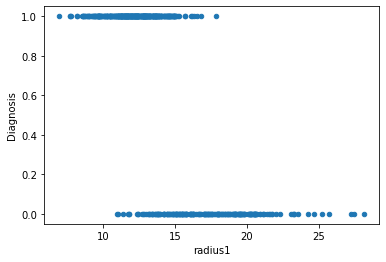

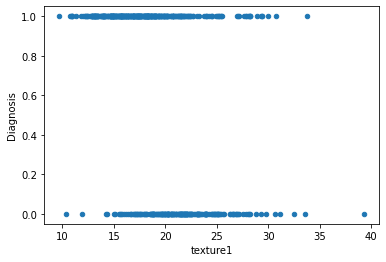

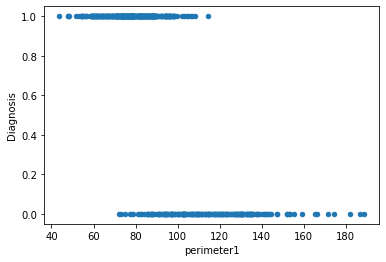

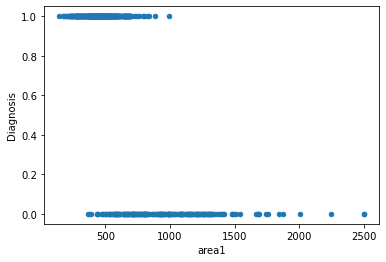

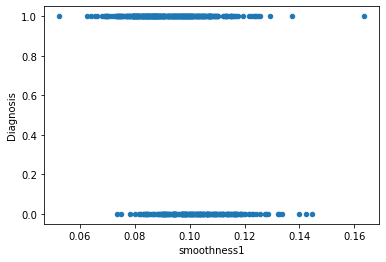

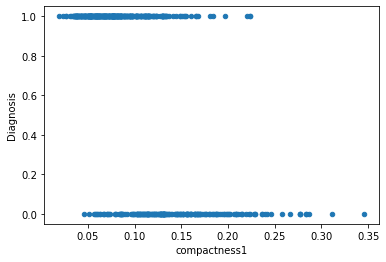

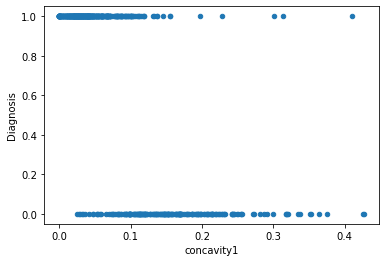

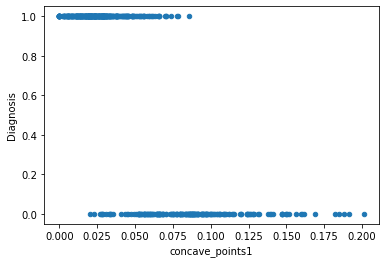

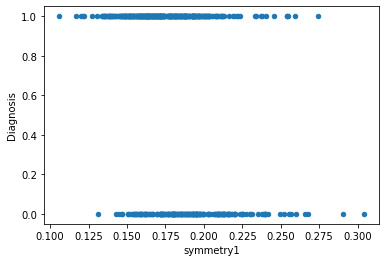

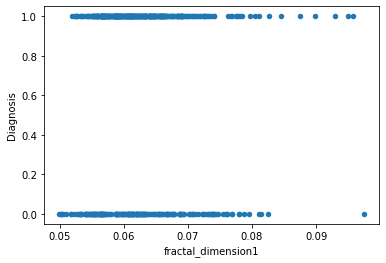

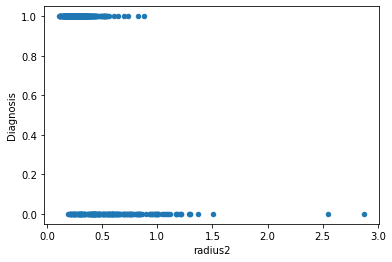

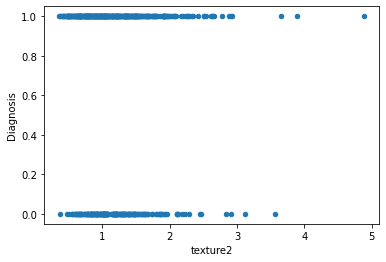

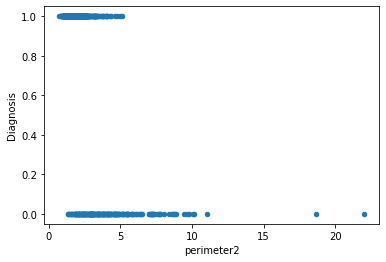

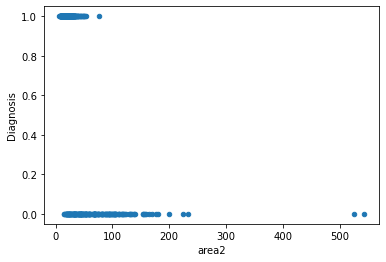

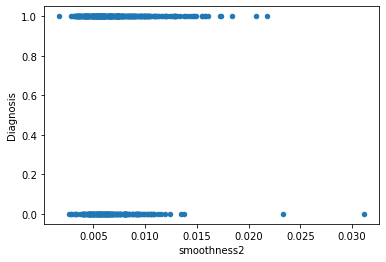

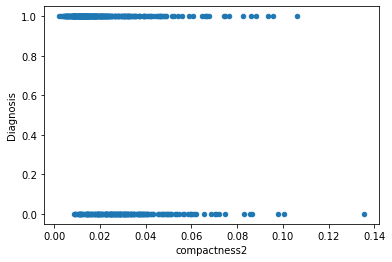

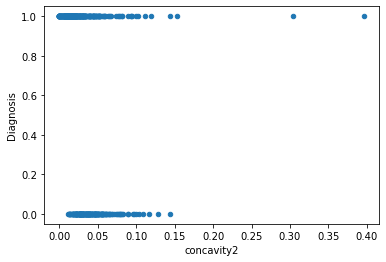

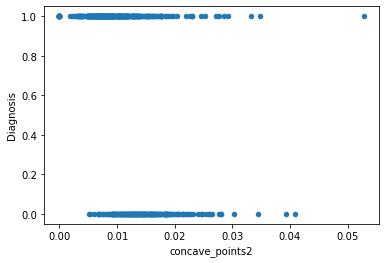

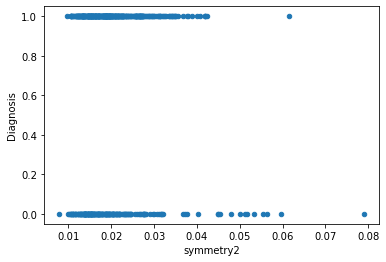

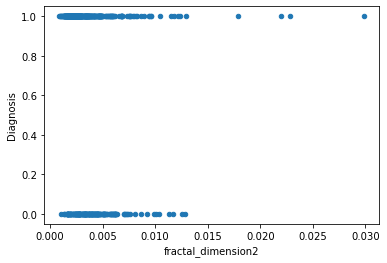

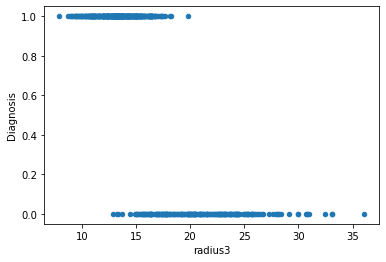

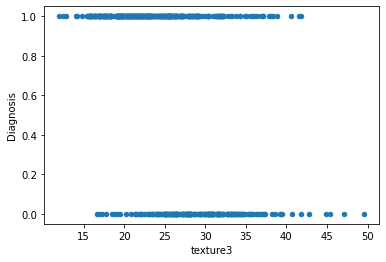

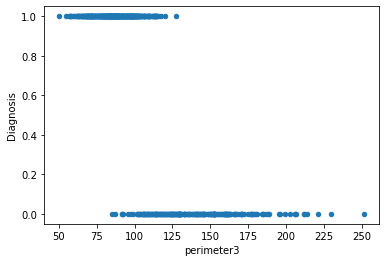

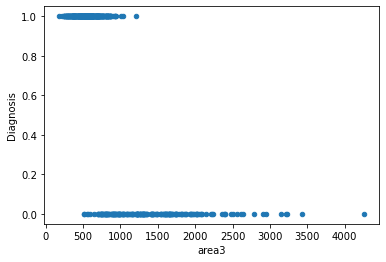

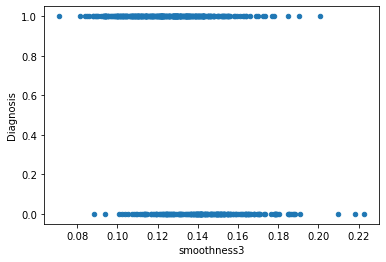

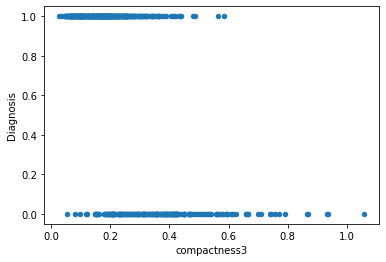

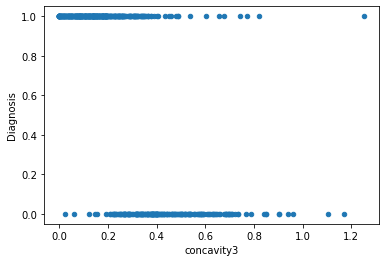

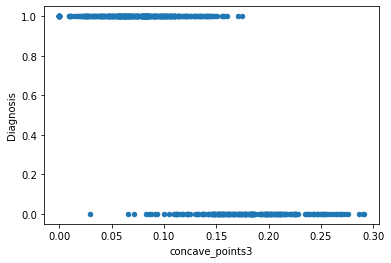

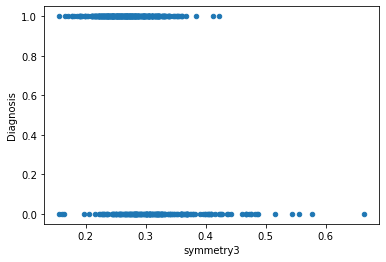

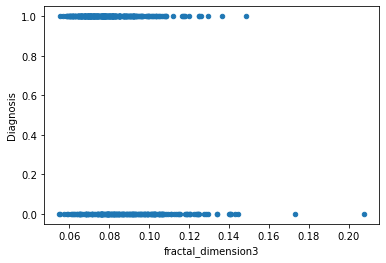

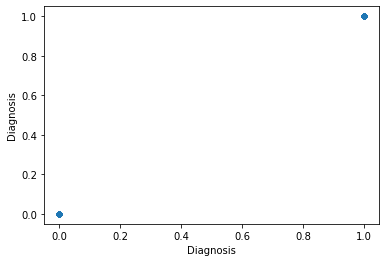

In [102]:
from matplotlib import pyplot as plt
for c in breast.columns:
    breast.plot.scatter(x=c,y='Diagnosis')
    plt.show()

In [83]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

adult = X.join(y)

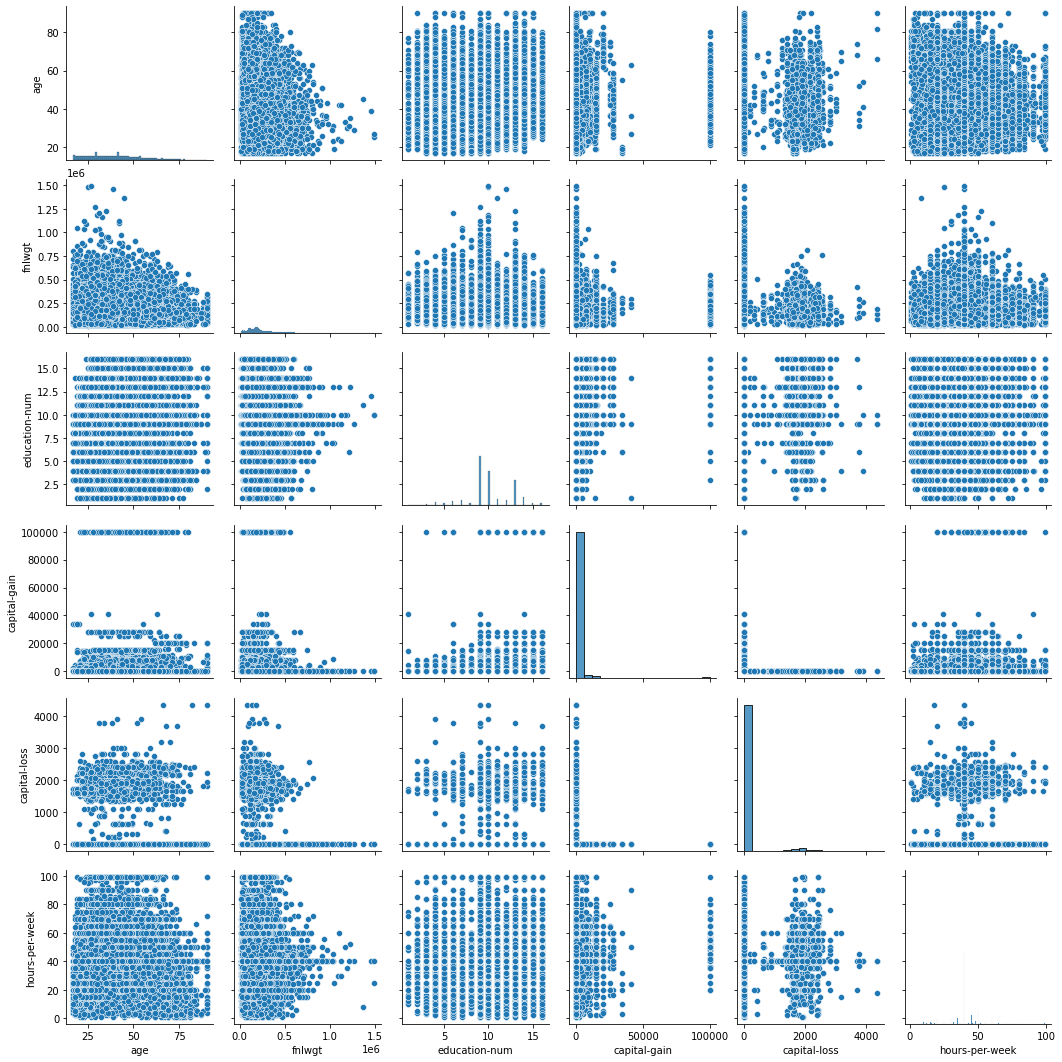

In [84]:
sns.pairplot(adult)

In [93]:
adult['income']=adult['income'].replace({'<=50K.':0,'<=50K':0,'>50K.':1,'>50K':1})

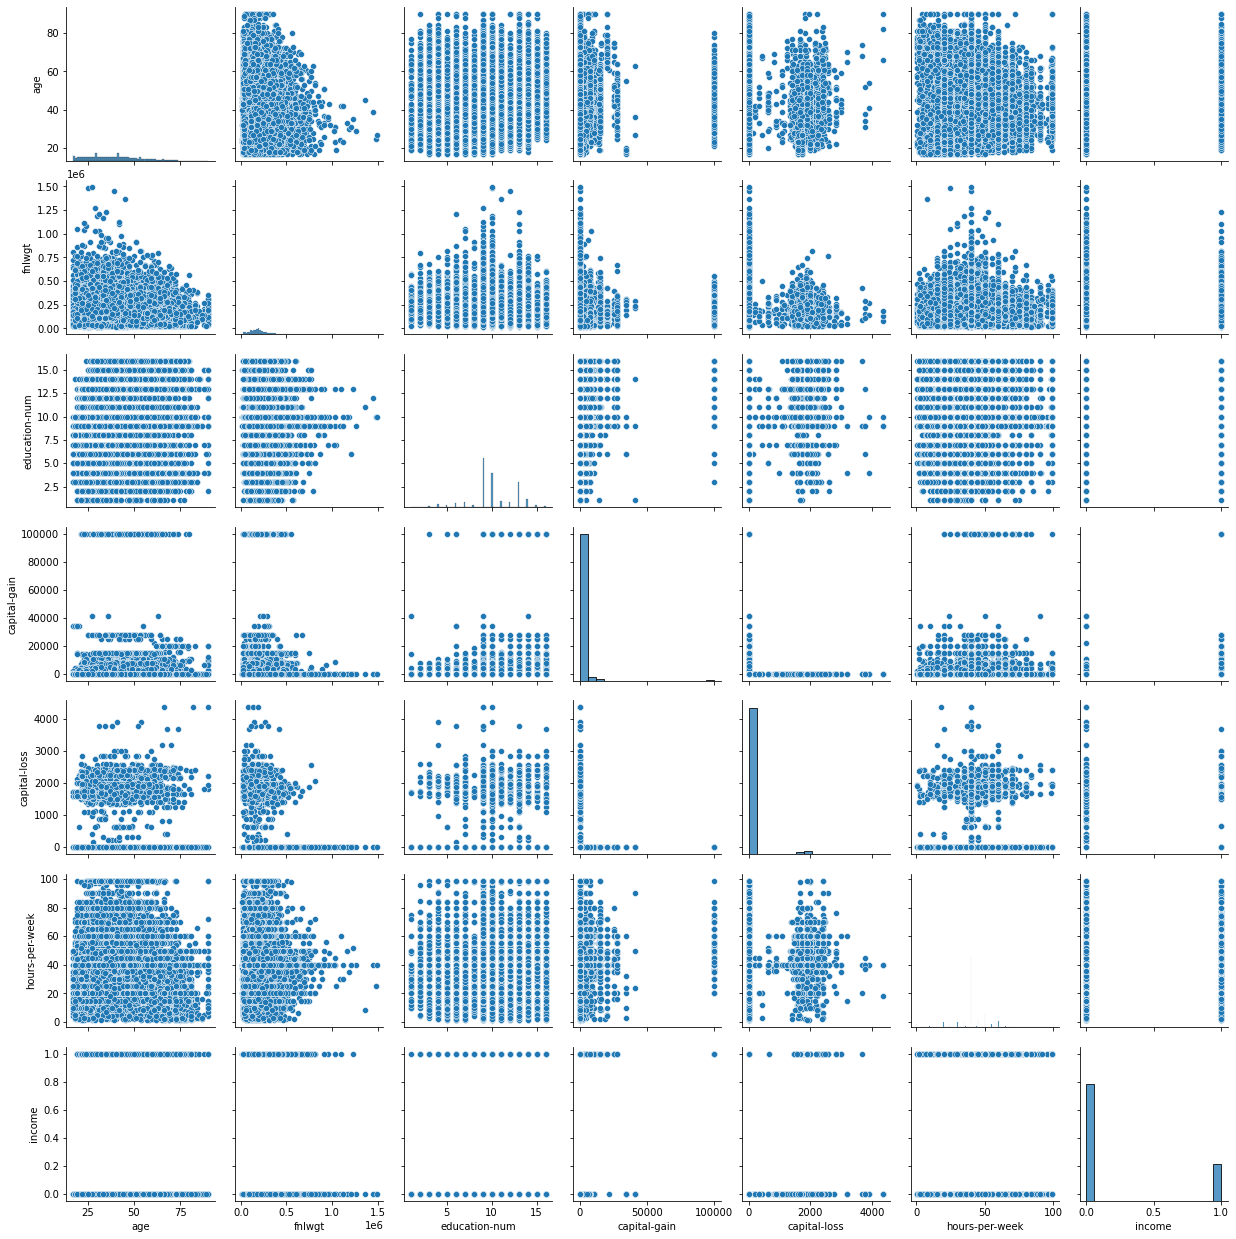

In [94]:
sns.pairplot(adult)

In [39]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

wine = X.join(y)

In [41]:
wine

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


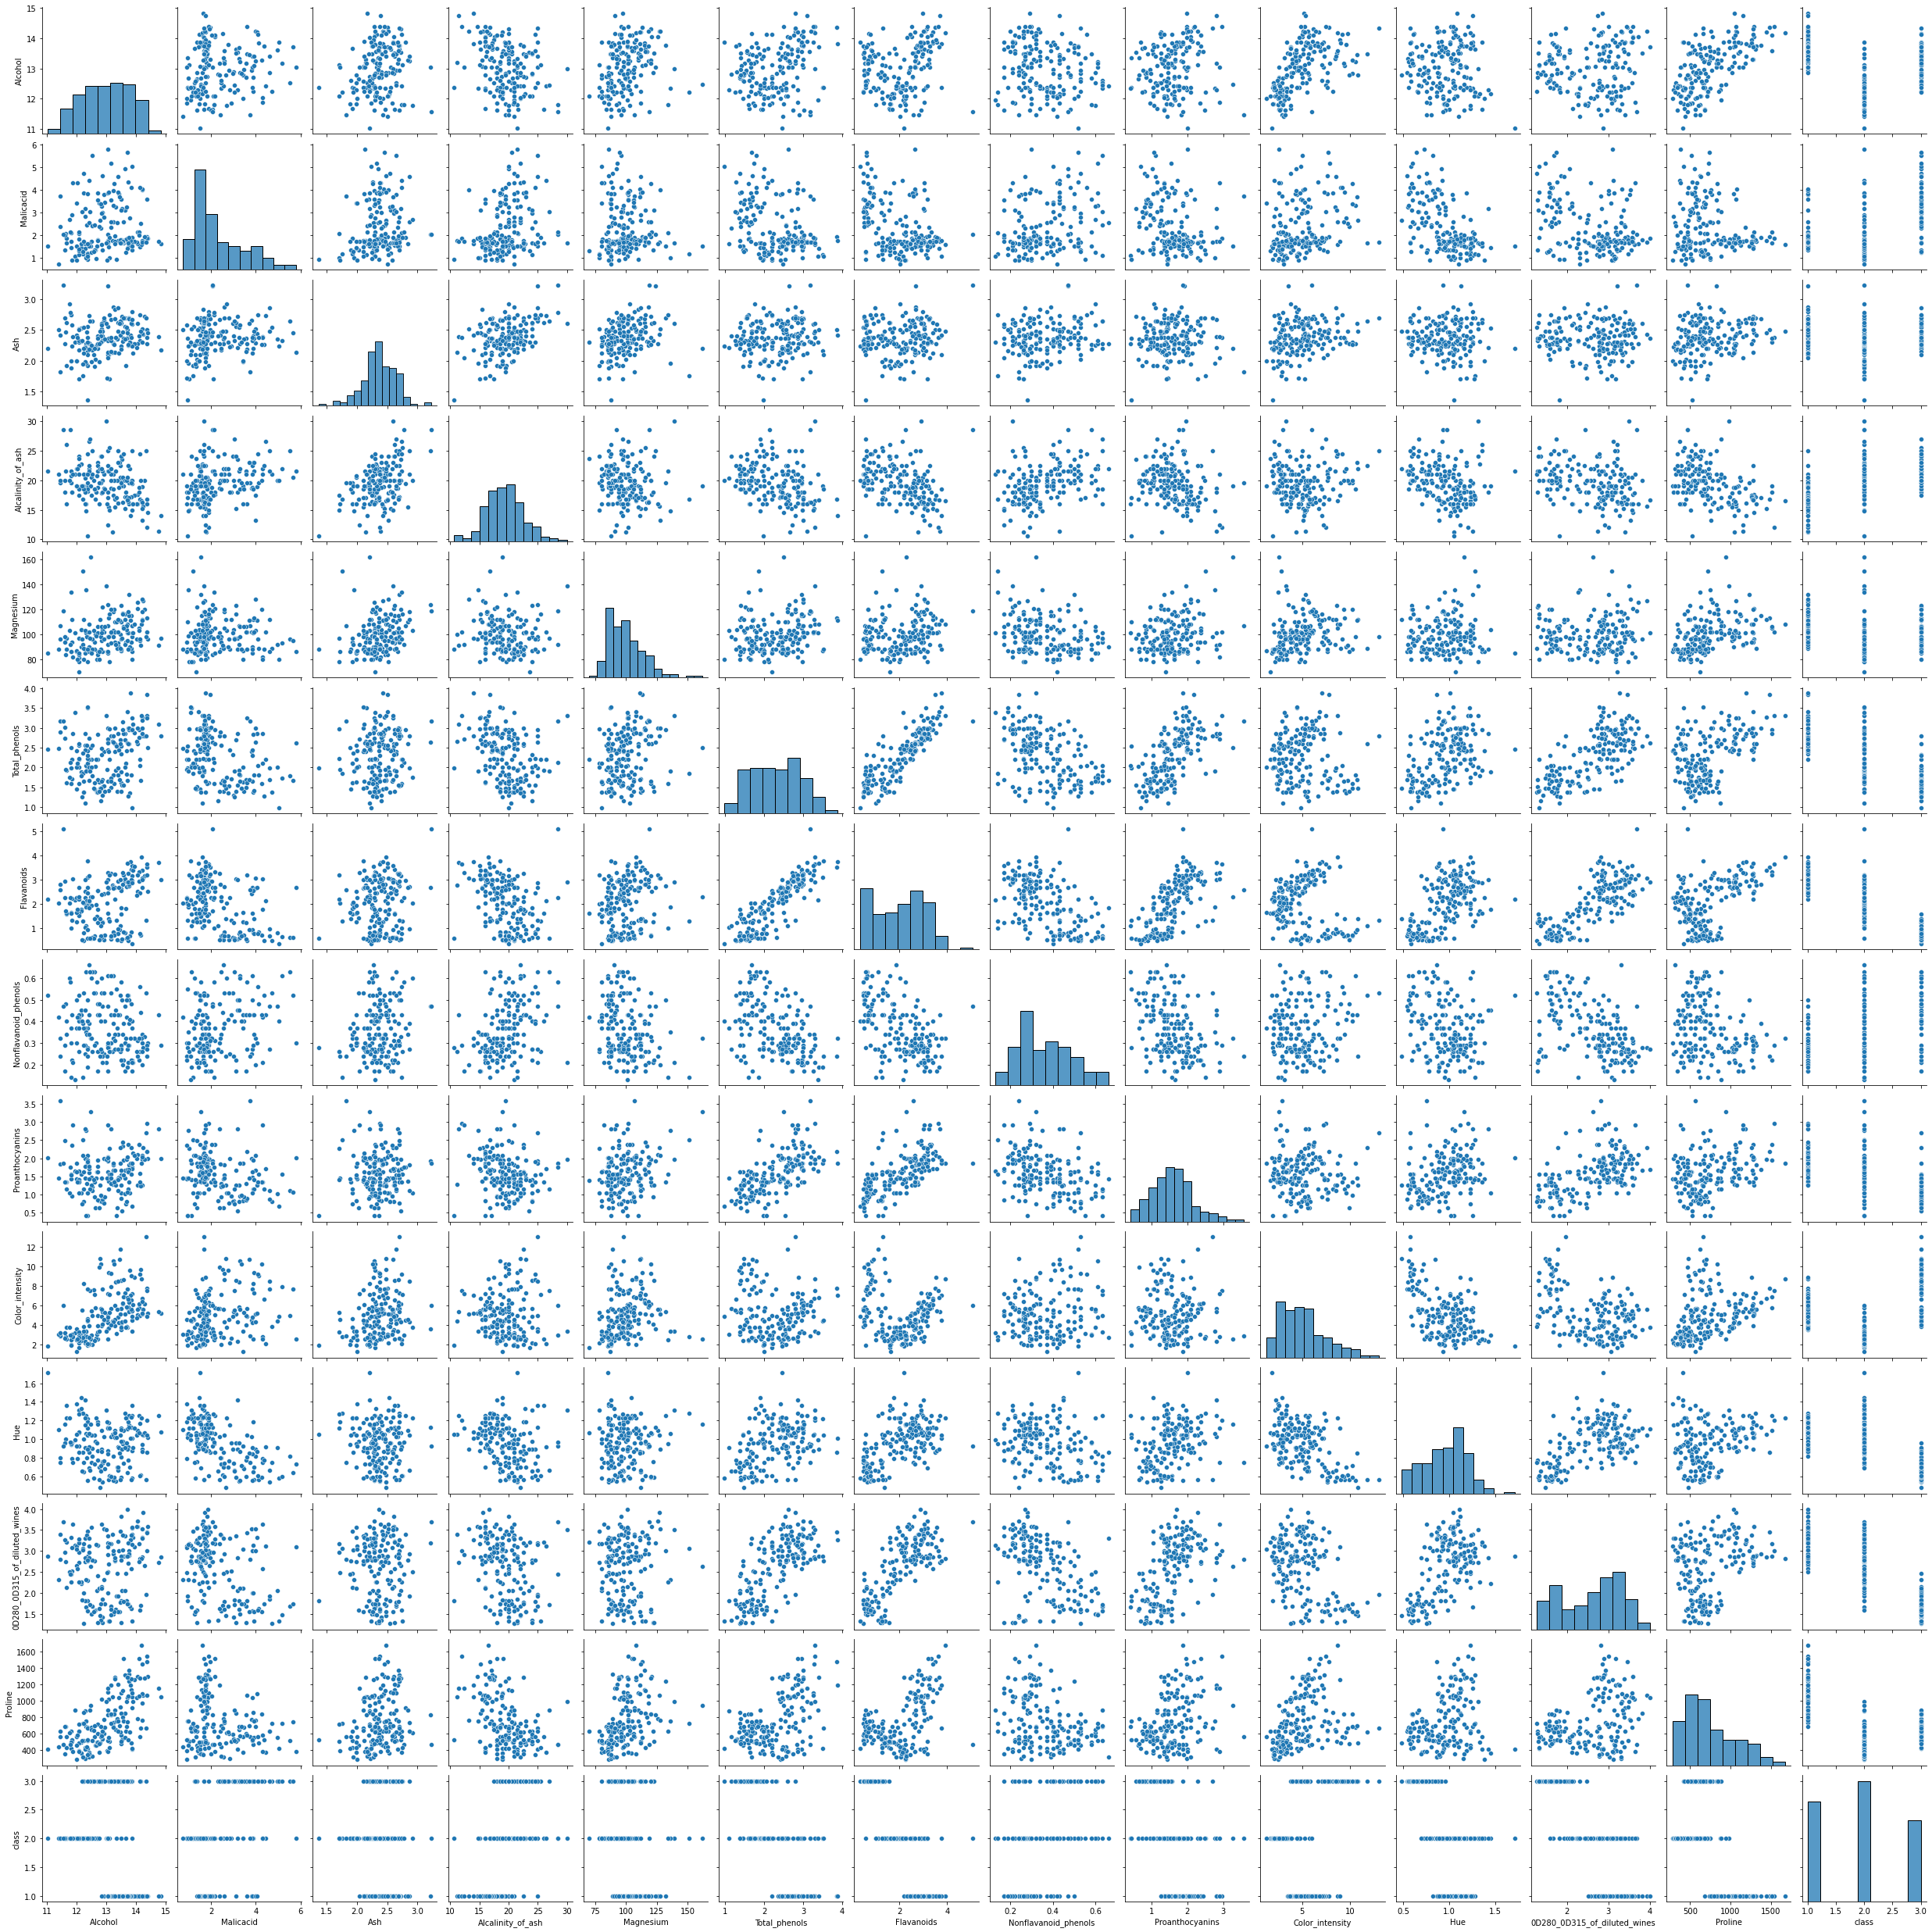

In [40]:
import seaborn as sns
sns.pairplot(wine)

In [1]:
from statsmodels.formula.api import logit
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [75]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

In [76]:
iris['data']['species']=iris['target']
iris = iris['data']
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [79]:
iris=iris[iris['species']>0]

<AxesSubplot:xlabel='petal length (cm)', ylabel='species'>

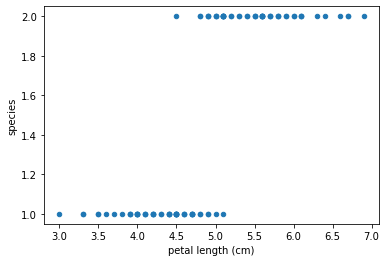

In [80]:
iris.plot.scatter(x='petal length (cm)', y='species')

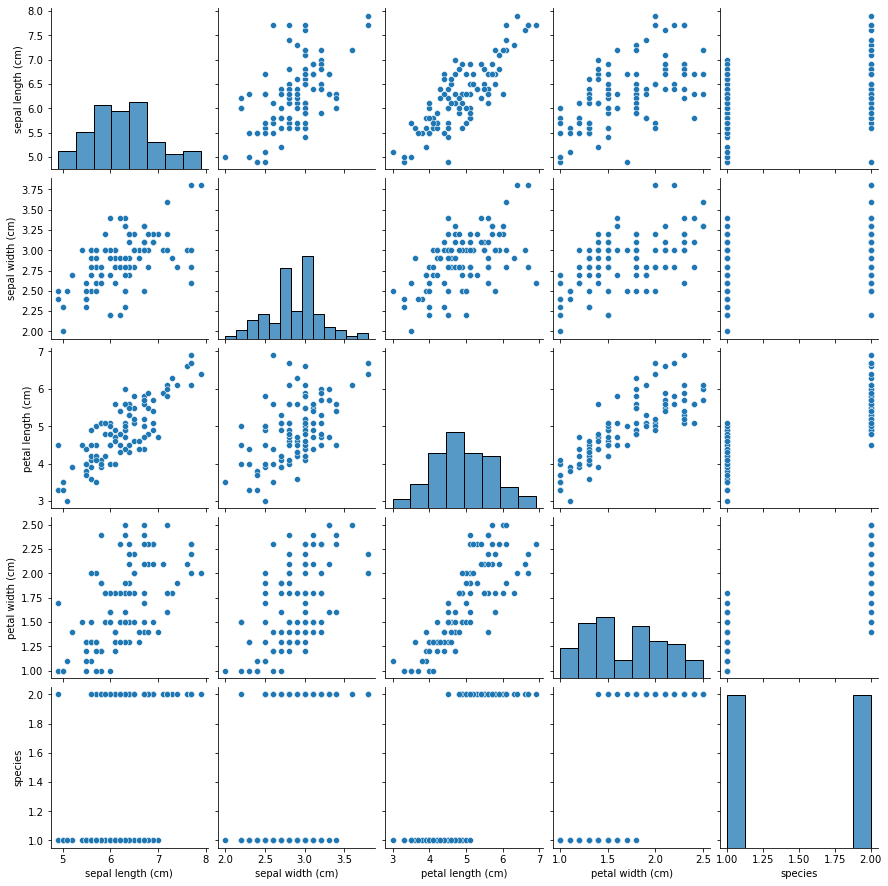

In [72]:
sns.pairplot(iris)

In [18]:
logit("Survived ~ Pclass + Sex ",titanic).fit().summary()

Optimization terminated successfully.
         Current function value: 0.464195
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.3029
Time:                        20:56:05   Log-Likelihood:                -413.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.798e-79
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.2946      0.297     11.077      0.000       2.712       3.878
Sex[T.male]    -2.6434      0.184    -14.380      0.000      -3.004      -2.283
Pclass         -0.9606      0.106     -9.057      0.000      -1.168      -0.753
===============================================================================
"""

In [ ]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic